Step 1: Preprocess the Data

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
df.head()

,SL,Emotion,Text,Year,Racial Biases,Hatred Percentage,Depression Percentage
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,2016,NaN,NaN,NaN
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,2016,NaN,NaN,NaN
2,3,angry,ভেজাল নির্বাচন ।,2016,NaN,NaN,NaN
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,2016,NaN,NaN,NaN
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",2016,NaN,NaN,NaN


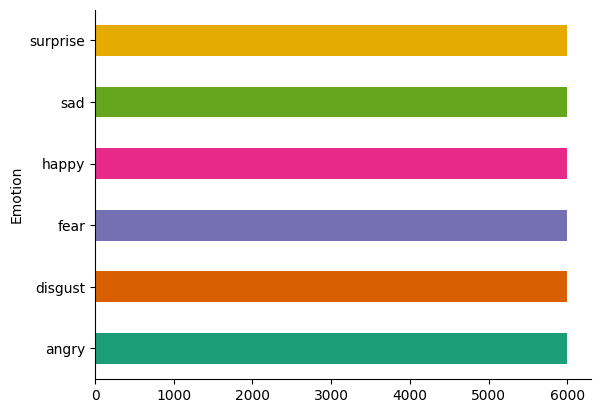

In [ ]:
# @title Emotion

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Emotion_label'] = le.fit_transform(df['Emotion'])


In [5]:
#drop Racial biases
df.drop(['Racial Biases'], axis=1, inplace=True)
#drop Hatred Percentage
df.drop(['Hatred Percentage',], axis=1, inplace=True)
#drop Depression Percentage
df.drop(['Depression Percentage'], axis=1, inplace=True)
#drop year
df.drop(['Year'], axis=1, inplace=True)


In [6]:
#data preprocessing using spacy

#removing unnecessary punctuation
import re

# Data cleaning function
def process_comments(Comment):
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    return Comment

df['Cleaned'] = df['Text'].apply(process_comments)
df.head()


,SL,Emotion,Text,Emotion_label,Cleaned
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,1,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,1,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...
2,3,angry,ভেজাল নির্বাচন ।,0,ভেজাল নির্বাচন
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,3,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",0,সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল এ...


In [7]:
import pandas as pd

# Load Bengali stop words from a CSV file
stop_words_df = pd.read_csv('stopwords_bangla.csv')  # Assuming the CSV has one column with stop words
stop_words_df=stop_words_df.drop(['Unnamed: 0'], axis=1)
# Convert the stop words to a list
stop_words_list = stop_words_df.iloc[:, 0].tolist()  # Convert the column to a list

# Check the stop words list
print("Stop words list:", stop_words_list[:10])  # Print first 10 stop words for verification


# Function to remove stop words
def remove_stop_words(text, stop_words):
    if isinstance(text, str):  # Ensure the text is a string
        # Tokenize text (simple split for Bengali)
        words = text.split()
        # Filter out stop words
        filtered_words = [word for word in words if word not in stop_words]
        # Join words back into a single string
        return ' '.join(filtered_words)
    else:
        return text  # If text is not a string, return it as is

# Assuming 'df' is the DataFrame and 'Cleaned' is the column with text data
# Check a few entries in the original DataFrame
print("Original texts:", df['Cleaned'].head())

# Apply the function to the DataFrame
df['filtered_text'] = df['Cleaned'].apply(lambda x: remove_stop_words(x, stop_words_list))


df.head()

Stop words list: ['অই', 'অগত্যা', 'অত: পর', 'অতএব', 'অথচ', 'অথবা', 'অধিক', 'অধীনে', 'অধ্যায়', 'অনুগ্রহ']
Original texts: 0    নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...
1    জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...
2                                     ভেজাল নির্বাচন  
3    বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...
4    সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল  এ...
Name: Cleaned, dtype: object


,SL,Emotion,Text,Emotion_label,Cleaned,filtered_text
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,1,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভোট ব...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,1,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,জনগণ মনের আনন্দে ভোট কাস্ট দেশদ্রোহী পেট্রল বো...
2,3,angry,ভেজাল নির্বাচন ।,0,ভেজাল নির্বাচন,ভেজাল নির্বাচন
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,3,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,বিএনপি রাজাকার সমর্থকরা হেরে দেশের আমিও সন্তুষ...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",0,সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল এ...,সূক্ষ্ম কারচুপি এতদিন একটা কথার কথা বাস্তব রূপ...


In [8]:
X = df['filtered_text']

In [9]:
y = df['Emotion_label']

In [10]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from gensim.models import Word2Vec

# Train Word2Vec model on the training data
word2vec_model = Word2Vec(sentences=x_train, vector_size=100, window=5, min_count=1, workers=4)

# Function to convert text to Word2Vec embeddings
def text_to_embedding(text, model, max_length):
    embedding = []
    for word in text:
        if word in model.wv:
            embedding.append(model.wv[word])
        else:
            embedding.append([0] * model.vector_size)
    if len(embedding) < max_length:
        embedding.extend([[0] * model.vector_size] * (max_length - len(embedding)))
    return embedding[:max_length]

# Set the maximum sequence length
max_sequence_length = 100

# Convert texts to embeddings
x_train_emb = np.array([text_to_embedding(text, word2vec_model, max_sequence_length) for text in x_train])
x_test_emb = np.array([text_to_embedding(text, word2vec_model, max_sequence_length) for text in x_test])


##simple RNN

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.layers import Masking

# Define the RNN model
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 100)))
model.add(SimpleRNN(units=128))
model.add(Dense(units= 6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train_emb, y_train, epochs=20, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking (Masking)                    │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          29,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,086 (117.52 KB)

 Trainable params: 30,086 (117.52 KB)

 Non-trainable params: 0 (0.00 B)

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = np.argmax(model.predict(x_test_emb), axis=1)

# Print classification report
print("Results for RNN with Word2Vec:")
print(classification_report(y_test, y_pred))


225/225 [==============================] - 2s 9ms/step
Results for RNN with Word2Vec:
              precision    recall  f1-score   support

           0       0.62      0.58      0.60      1226
           1       0.72      0.71      0.72      1188
           2       0.78      0.77      0.77      1129
           3       0.65      0.65      0.65      1246
           4       0.48      0.49      0.48      1244
           5       0.73      0.77      0.75      1167

    accuracy                           0.66      7200
   macro avg       0.66      0.66      0.66      7200
weighted avg       0.66      0.66      0.66      7200



##RNN(LSTM)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Masking, Bidirectional

# Define the BiLSTM model
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 100)))
model.add(Bidirectional(LSTM(units=128, return_sequences=False, recurrent_regularizer='l2', use_bias=False, kernel_initializer='lecun_uniform', implementation=1)))
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train_emb, y_train, epochs=10, batch_size=32, validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_1 (Masking)         (None, 100, 100)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               233472    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 235014 (918.02 KB)
Trainable params: 235014 (918.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
720/720 [==============================] - 53s 69ms/step - loss: 1.8428 - accuracy: 0.2503 - val_loss: 1.7152 - val_accuracy: 0.2743
Epoch 2/10
720/720 [==============================] - 49s 68ms/step 

In [ ]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = np.argmax(model.predict(x_test_emb), axis=1)

# Print classification report
print("Results for RNN with Word2Vec:")
print(classification_report(y_test, y_pred))


225/225 [==============================] - 6s 23ms/step
Results for RNN with Word2Vec:
              precision    recall  f1-score   support

           0       0.54      0.54      0.54      1226
           1       0.59      0.72      0.65      1188
           2       0.68      0.71      0.69      1129
           3       0.62      0.58      0.60      1246
           4       0.45      0.33      0.38      1244
           5       0.63      0.70      0.66      1167

    accuracy                           0.59      7200
   macro avg       0.58      0.59      0.59      7200
weighted avg       0.58      0.59      0.58      7200



#CNN

In [13]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding, Masking

# Define the CNN model
model = Sequential()

# Add a Masking layer to handle padding in sequences
model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 100)))  # Assuming input_shape remains the same

# Add the first convolutional layer
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))

# Add a max pooling layer to downsample the input
model.add(MaxPooling1D(pool_size=2))

# Flatten the output from the convolutional and pooling layers
model.add(Flatten())

# Add a fully connected Dense layer
model.add(Dense(units=128, activation='relu'))

# Add the output layer with 6 units (for 6 classes) and softmax activation
model.add(Dense(units=6, activation='softmax'))

# Compile the CNN model
model.compile(
    loss='sparse_categorical_crossentropy',  # Suitable for integer-encoded labels
    optimizer='adam',                        # Adam optimizer for adaptive learning
    metrics=['accuracy']                     # Track accuracy during training
)

# Display the model's architecture
model.summary()

# Train the CNN model
model.fit(
    x_train_emb,              # Training input data (e.g., embeddings)
    y_train,                  # Training labels
    epochs=40,                # Number of training epochs
    batch_size=32,            # Batch size
    validation_split=0.2      # Fraction of training data used for validation
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking (Masking)                    │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 100, 128)            │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 50, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 884,230 (3.37 MB)

 Trainable params: 884,230 (3.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3506 - loss: 1.6076 - val_accuracy: 0.6477 - val_loss: 1.0331
Epoch 2/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7543 - loss: 0.7570 - val_accuracy: 0.7569 - val_loss: 0.7803
Epoch 3/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8618 - loss: 0.4489 - val_accuracy: 0.7898 - val_loss: 0.7460
Epoch 4/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9157 - loss: 0.2984 - val_accuracy: 0.8087 - val_loss: 0.7704
Epoch 5/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9376 - loss: 0.2253 - val_accuracy: 0.8111 - val_loss: 0.7819
Epoch 6/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9486 - loss: 0.1798 - val_accuracy: 0.8149 - val_loss: 0.8357
Epoch 7/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9555 - loss: 0.1521 - val_accuracy: 0.8205 - val_loss: 0.7912
Epoch 8/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9531 - loss: 0.1445 - val_accuracy: 0.

In [14]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = np.argmax(model.predict(x_test_emb), axis=1)

# Print classification report
print("Results for RNN with Word2Vec:")
print(classification_report(y_test, y_pred))


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Results for RNN with Word2Vec:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1226
           1       0.85      0.87      0.86      1188
           2       0.89      0.85      0.87      1129
           3       0.84      0.80      0.82      1246
           4       0.71      0.69      0.70      1244
           5       0.80      0.91      0.85      1167

    accuracy                           0.82      7200
   macro avg       0.82      0.82      0.82      7200
weighted avg       0.82      0.82      0.82      7200



In [16]:
# Save the model in the native Keras format
model.save('CNN.keras')


#CNN+BiLSTM

In [18]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Embedding, Masking, Bidirectional, LSTM

# Define the CNN-BiLSTM model
model = Sequential()

# Masking layer to handle padding
model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 100)))

# Convolutional layers
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))

# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=128, return_sequences=False, recurrent_regularizer='l2', use_bias=False, kernel_initializer='lecun_uniform', implementation=1)))

# Output layer
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train_emb, y_train, epochs=20, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d_3' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking_2 (Masking)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 100, 128)            │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 50, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 50, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 25, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         262,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 409,862 (1.56 MB)

 Trainable params: 409,862 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.2437 - loss: 2.1174 - val_accuracy: 0.4535 - val_loss: 1.4326
Epoch 2/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5274 - loss: 1.2529 - val_accuracy: 0.6193 - val_loss: 1.0825
Epoch 3/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7037 - loss: 0.8558 - val_accuracy: 0.7017 - val_loss: 0.9194
Epoch 4/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7943 - loss: 0.6166 - val_accuracy: 0.7389 - val_loss: 0.8571
Epoch 5/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8526 - loss: 0.4630 - val_accuracy: 0.7663 - val_loss: 0.8088
Epoch 6/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8884 - loss: 0.3586 - val_accuracy: 0.7826 - val_loss: 0.8231
Epoch 7/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9114 - loss: 0.2862 - val_accuracy: 0.7911 - val_loss: 0.8394
Epoch 8/20
720/720 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9204 - loss: 0.2528 - val_

In [19]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = np.argmax(model.predict(x_test_emb), axis=1)

# Print classification report
print("Results for RNN with Word2Vec:")
print(classification_report(y_test, y_pred))


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Results for RNN with Word2Vec:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1226
           1       0.85      0.85      0.85      1188
           2       0.86      0.87      0.86      1129
           3       0.82      0.83      0.82      1246
           4       0.66      0.73      0.69      1244
           5       0.85      0.87      0.86      1167

    accuracy                           0.81      7200
   macro avg       0.82      0.81      0.82      7200
weighted avg       0.82      0.81      0.81      7200



In [20]:
# Save the trained model
model.save('CNN+BILSTM.keras')  # Save the model in the current working directory with the name 'CNN+BILSTM'

##BGRU

In [21]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding, Masking, Bidirectional

# Define the BGRU model
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 100)))
model.add(Bidirectional(GRU(units=128, return_sequences=False, recurrent_regularizer='l2', use_bias=False, kernel_initializer='lecun_uniform', implementation=1)))
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train_emb, y_train, epochs=80, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking_3 (Masking)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 256)                 │         175,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,646 (690.02 KB)

 Trainable params: 176,646 (690.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = np.argmax(model.predict(x_test_emb), axis=1)

# Print classification report
print("Results for RNN with Word2Vec:")
print(classification_report(y_test, y_pred))


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Results for RNN with Word2Vec:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68      1226
           1       0.73      0.79      0.76      1188
           2       0.75      0.84      0.79      1129
           3       0.78      0.69      0.73      1246
           4       0.64      0.42      0.51      1244
           5       0.74      0.84      0.79      1167

    accuracy                           0.71      7200
   macro avg       0.71      0.72      0.71      7200
weighted avg       0.71      0.71      0.71      7200



##CNN+BGRU

In [22]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Masking, Bidirectional, Dropout

# Define the CNN + BGRU model
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 100)))

# CNN Layer
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# BGRU Layer
model.add(Bidirectional(GRU(units=128, return_sequences=False, recurrent_regularizer='l2', use_bias=False, kernel_initializer='lecun_uniform', implementation=1)))

# Fully Connected Layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train_emb, y_train, epochs=40, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d_5' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking_4 (Masking)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 100, 64)             │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 256)                 │         147,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,558 (717.02 KB)

 Trainable params: 183,558 (717.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.2005 - loss: 2.2361 - val_accuracy: 0.2682 - val_loss: 1.7234
Epoch 2/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.2801 - loss: 1.7016 - val_accuracy: 0.3316 - val_loss: 1.6337
Epoch 3/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.3373 - loss: 1.6204 - val_accuracy: 0.3809 - val_loss: 1.5728
Epoch 4/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.3851 - loss: 1.5341 - val_accuracy: 0.4243 - val_loss: 1.4708
Epoch 5/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.4442 - loss: 1.4275 - val_accuracy: 0.4681 - val_loss: 1.3862
Epoch 6/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.4838 - loss: 1.3416 - val_accuracy: 0.5236 - val_loss: 1.2911
Epoch 7/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.5289 - loss: 1.2400 - val_accuracy: 0.5285 - val_loss: 1.2742
Epoch 8/40
720/720 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.5671 - loss: 1.1692 - 

In [23]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = np.argmax(model.predict(x_test_emb), axis=1)

# Print classification report
print("Results for RNN with Word2Vec:")
print(classification_report(y_test, y_pred))


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Results for RNN with Word2Vec:
              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1226
           1       0.80      0.86      0.83      1188
           2       0.80      0.89      0.84      1129
           3       0.81      0.79      0.80      1246
           4       0.70      0.60      0.65      1244
           5       0.79      0.91      0.84      1167

    accuracy                           0.79      7200
   macro avg       0.79      0.79      0.79      7200
weighted avg       0.79      0.79      0.79      7200



In [24]:
# Save the trained model
model.save('CNN+BGRU.keras')  # Save the model in the current working directory with the name 'CNN+BILSTM'

cnn+bgru+bilstm

In [25]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, LSTM, Dense, Masking, Bidirectional, Dropout

# Define the CNN + BiLSTM + BGRU + BiLSTM model
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 100)))

# CNN Layer
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# First BiLSTM Layer (before BGRU)
model.add(Bidirectional(LSTM(units=64, return_sequences=True, recurrent_regularizer='l2', use_bias=False, kernel_initializer='lecun_uniform')))

# BGRU Layer
model.add(Bidirectional(GRU(units=128, return_sequences=True, recurrent_regularizer='l2', use_bias=False, kernel_initializer='lecun_uniform', implementation=1)))

# Second BiLSTM Layer (after BGRU)
model.add(Bidirectional(LSTM(units=64, return_sequences=False, recurrent_regularizer='l2', use_bias=False, kernel_initializer='lecun_uniform')))

# Fully Connected Layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(units=6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train_emb, y_train, epochs=40, batch_size=64, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d_6' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking_5 (Masking)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 100, 64)             │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 50, 128)             │          65,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 50, 256)             │         196,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 128)                 │         163,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 453,894 (1.73 MB)

 Trainable params: 453,894 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
360/360 ━━━━━━━━━━━━━━━━━━━━ 34s 64ms/step - accuracy: 0.1993 - loss: 3.2208 - val_accuracy: 0.3142 - val_loss: 1.6810
Epoch 2/40
360/360 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.3378 - loss: 1.6354 - val_accuracy: 0.3993 - val_loss: 1.5293
Epoch 3/40
360/360 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.4263 - loss: 1.4786 - val_accuracy: 0.4585 - val_loss: 1.4074
Epoch 4/40
360/360 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.5051 - loss: 1.3178 - val_accuracy: 0.5238 - val_loss: 1.2826
Epoch 5/40
360/360 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.5806 - loss: 1.1558 - val_accuracy: 0.5778 - val_loss: 1.1737
Epoch 6/40
360/360 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.6391 - loss: 1.0164 - val_accuracy: 0.6113 - val_loss: 1.1149
Epoch 7/40
360/360 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.6964 - loss: 0.8972 - val_accuracy: 0.6630 - val_loss: 1.0413
Epoch 8/40
360/360 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.7507 - loss: 0.7569 - 

In [26]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = np.argmax(model.predict(x_test_emb), axis=1)

# Print classification report
print("Results for RNN with Word2Vec:")
print(classification_report(y_test, y_pred))


225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
Results for RNN with Word2Vec:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1226
           1       0.85      0.88      0.86      1188
           2       0.86      0.90      0.88      1129
           3       0.82      0.84      0.83      1246
           4       0.76      0.66      0.71      1244
           5       0.84      0.90      0.87      1167

    accuracy                           0.83      7200
   macro avg       0.83      0.83      0.83      7200
weighted avg       0.83      0.83      0.83      7200



In [27]:
# Save the trained model
model.save('CNN+BGRU+BILSTM.keras')  # Save the model in the current working directory with the name 'CNN+BILSTM'

In [31]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

# Load pre-trained models
cnn_model = load_model('CNN.keras')
bilstm_model = load_model('CNN+BILSTM.keras')
bigru_model = load_model('CNN+BGRU.keras')
cnn_bilstm_bigru_model = load_model('CNN+BGRU+BILSTM.keras')

# Function to make predictions using the ensemble
def ensemble_predict(models, x_input):
    """
    Makes predictions using an ensemble of models by averaging their probabilities.

    Args:
    - models: List of trained models.
    - x_input: Input data to be predicted.

    Returns:
    - Final ensemble predictions as class labels.
    """
    # Get predictions from each model (probabilities)
    predictions = [model.predict(x_input) for model in models]

    # Average the probabilities
    avg_predictions = np.mean(predictions, axis=0)

    # Convert probabilities to class labels
    final_predictions = np.argmax(avg_predictions, axis=1)
    return final_predictions

# List of models
models = [cnn_model, bilstm_model, bigru_model, cnn_bilstm_bigru_model]

# Evaluate the ensemble
ensemble_preds = ensemble_predict(models, x_test_emb)  # Use the test data for evaluation
accuracy = accuracy_score(y_test, ensemble_preds)      # Compare predictions to ground truth

# Print the accuracy
print(f"Ensemble Model Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d_6' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step
Ensemble Model Accuracy: 83.79%


#bagging

In [32]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

# Load pre-trained models
cnn_model = load_model('CNN.keras')
bilstm_model = load_model('CNN+BILSTM.keras')
bigru_model = load_model('CNN+BGRU.keras')
cnn_bilstm_bigru_model = load_model('CNN+BGRU+BILSTM.keras')

# Bagging: Create subsets of training data for each model
def bagging_train(models, x_train, y_train, x_test, y_test, num_samples=1000):
    """
    Implements bagging by training multiple models on bootstrapped samples of the data.

    Args:
    - models: List of pre-trained models to be fine-tuned.
    - x_train: Training data.
    - y_train: Training labels.
    - x_test: Test data.
    - y_test: Test labels.
    - num_samples: Number of samples in each bootstrapped dataset.

    Returns:
    - Bagged ensemble accuracy.
    """
    predictions_list = []  # To store predictions from all models

    for model in models:
        # Bootstrap sample
        x_bootstrap, y_bootstrap = resample(x_train, y_train, n_samples=num_samples, random_state=42)

        # Fine-tune the pre-trained model on the bootstrap sample
        model.fit(x_bootstrap, y_bootstrap, epochs=5, batch_size=32, verbose=1)

        # Get predictions on the test set
        predictions = model.predict(x_test)
        predictions_list.append(predictions)

    # Average the probabilities across all models
    avg_predictions = np.mean(predictions_list, axis=0)

    # Convert probabilities to class labels
    final_predictions = np.argmax(avg_predictions, axis=1)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, final_predictions)
    return accuracy

# Call the bagging function
accuracy = bagging_train(
    models=[cnn_model, bilstm_model, bigru_model, cnn_bilstm_bigru_model],
    x_train=x_train_emb,
    y_train=y_train,
    x_test=x_test_emb,
    y_test=y_test,
    num_samples=1000
)

# Print the accuracy
print(f"Bagged Ensemble Model Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d_3' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d_5' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/sr

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.9417 - loss: 0.2558
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9569 - loss: 0.1187
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9757 - loss: 0.0637
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9767 - loss: 0.0490
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9839 - loss: 0.0335
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.9116 - loss: 0.3442
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9706 - loss: 0.1173
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9937 - loss: 0.0379
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9860 - loss: 0.0372
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9870 - loss: 0.0250
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - accuracy: 0.8574 - loss: 0.603

#boosting

In [33]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

# Load pre-trained models
cnn_model = load_model('CNN.keras')
bilstm_model = load_model('CNN+BILSTM.keras')
bigru_model = load_model('CNN+BGRU.keras')
cnn_bilstm_bigru_model = load_model('CNN+BGRU+BILSTM.keras')

# Boosting: Sequentially train models and assign weights based on their performance
def boosting_train(models, x_train, y_train, x_test, y_test, epochs=5, batch_size=32):
    """
    Implements boosting by sequentially training models and assigning weights based on performance.

    Args:
    - models: List of pre-trained models.
    - x_train: Training data.
    - y_train: Training labels.
    - x_test: Test data.
    - y_test: Test labels.
    - epochs: Number of epochs for training each model.
    - batch_size: Batch size for training.

    Returns:
    - Final boosted ensemble accuracy.
    """
    weights = []  # Store weights for each model based on their performance
    predictions_list = []  # Store predictions from all models

    for model in models:
        # Train the model
        model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

        # Predict probabilities on the test set
        predictions = model.predict(x_test)
        predictions_list.append(predictions)

        # Convert probabilities to class labels
        predicted_classes = np.argmax(predictions, axis=1)

        # Calculate accuracy for this model
        accuracy = accuracy_score(y_test, predicted_classes)

        # Assign weight based on accuracy
        weights.append(accuracy)

    # Normalize weights so they sum to 1
    normalized_weights = np.array(weights) / np.sum(weights)

    # Weighted sum of probabilities
    weighted_predictions = np.zeros_like(predictions_list[0])
    for i, predictions in enumerate(predictions_list):
        weighted_predictions += normalized_weights[i] * predictions

    # Convert weighted probabilities to class labels
    final_predictions = np.argmax(weighted_predictions, axis=1)

    # Calculate overall accuracy
    final_accuracy = accuracy_score(y_test, final_predictions)
    return final_accuracy

# Call the boosting function
accuracy = boosting_train(
    models=[cnn_model, bilstm_model, bigru_model, cnn_bilstm_bigru_model],
    x_train=x_train_emb,
    y_train=y_train,
    x_test=x_test_emb,
    y_test=y_test,
    epochs=5,
    batch_size=32
)

# Print the accuracy
print(f"Boosted Ensemble Model Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d_3' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d_5' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/sr

Epoch 1/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9190 - loss: 0.3330
Epoch 2/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9528 - loss: 0.1256
Epoch 3/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9614 - loss: 0.0908
Epoch 4/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9641 - loss: 0.0798
Epoch 5/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9616 - loss: 0.0821
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d_3' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


900/900 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9071 - loss: 0.3461
Epoch 2/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9409 - loss: 0.1727
Epoch 3/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9492 - loss: 0.1325
Epoch 4/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9517 - loss: 0.1250
Epoch 5/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9532 - loss: 0.1236
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d_5' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


900/900 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 0.8261 - loss: 0.5924
Epoch 2/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.8470 - loss: 0.4823
Epoch 3/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.8546 - loss: 0.4392
Epoch 4/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.8552 - loss: 0.4288
Epoch 5/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.8519 - loss: 0.4179
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d_6' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


900/900 ━━━━━━━━━━━━━━━━━━━━ 50s 44ms/step - accuracy: 0.8329 - loss: 0.7151
Epoch 2/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 77s 44ms/step - accuracy: 0.9224 - loss: 0.2873
Epoch 3/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9296 - loss: 0.2518
Epoch 4/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9333 - loss: 0.2267
Epoch 5/5
900/900 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9312 - loss: 0.2395
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Boosted Ensemble Model Accuracy: 85.64%


#voting

In [1]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

# Load pre-trained models
cnn_model = load_model('CNN.keras')
bilstm_model = load_model('CNN+BILSTM.keras')
bigru_model = load_model('CNN+BGRU.keras')
cnn_bilstm_bigru_model = load_model('CNN+BGRU+BILSTM.keras')

# Hard Voting
def hard_voting(models, x_input):
    """
    Performs hard voting by taking the majority class from predictions of multiple models.

    Args:
    - models: List of trained models.
    - x_input: Input data to be predicted.

    Returns:
    - Final hard voting predictions as class labels.
    """
    # Get predictions from each model (class labels)
    predictions = [np.argmax(model.predict(x_input), axis=1) for model in models]

    # Stack predictions and take the majority vote for each instance
    predictions = np.array(predictions).T  # Shape: (num_samples, num_models)
    final_predictions = [np.bincount(pred).argmax() for pred in predictions]  # Majority voting
    return np.array(final_predictions)

# Soft Voting
def soft_voting(models, x_input):
    """
    Performs soft voting by averaging the predicted probabilities from multiple models.

    Args:
    - models: List of trained models.
    - x_input: Input data to be predicted.

    Returns:
    - Final soft voting predictions as class labels.
    """
    # Get predictions from each model (probabilities)
    predictions = [model.predict(x_input) for model in models]

    # Average the probabilities
    avg_predictions = np.mean(predictions, axis=0)

    # Convert probabilities to class labels
    final_predictions = np.argmax(avg_predictions, axis=1)
    return final_predictions

# List of models
models = [cnn_model, bilstm_model, bigru_model, cnn_bilstm_bigru_model]

# Evaluate Hard Voting
hard_preds = hard_voting(models, x_test_emb)  # Use the test data
hard_accuracy = accuracy_score(y_test, hard_preds)  # Compare predictions to ground truth

# Evaluate Soft Voting
soft_preds = soft_voting(models, x_test_emb)  # Use the test data
soft_accuracy = accuracy_score(y_test, soft_preds)  # Compare predictions to ground truth

# Print the accuracies
print(f"Hard Voting Ensemble Accuracy: {hard_accuracy * 100:.2f}%")
print(f"Soft Voting Ensemble Accuracy: {soft_accuracy * 100:.2f}%")


ValueError: File not found: filepath=CNN.keras. Please ensure the file is an accessible `.keras` zip file.